In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set target ID
target_id = 'TIC 381789320'

In [3]:
# Search for TESS FFI data
search_ffi = lk.search_tesscut(target_id)
ffi_data = search_ffi[1].download(cutout_size=20)

<AxesSubplot:title={'center':'Target ID: TIC 381789320, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

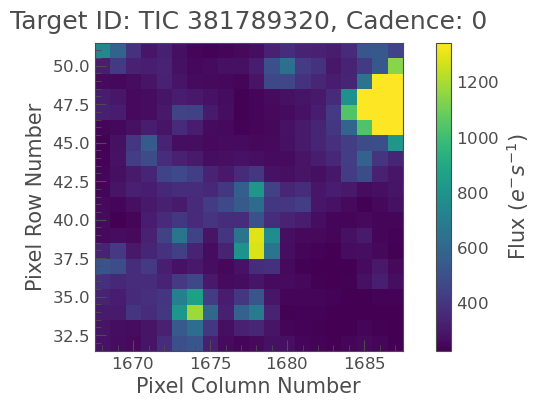

In [4]:
# Plot FFI data
ffi_data.plot()

<AxesSubplot:title={'center':'Target ID: TIC 381789320, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

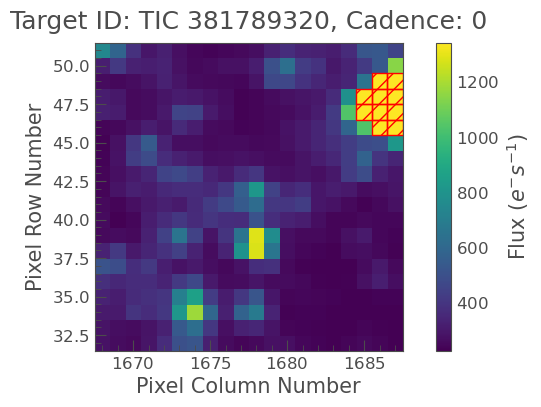

In [5]:
# Define aperture mask for FFI data
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
ffi_data.plot(aperture_mask=target_mask, mask_color='r')

In [6]:
# Convert FFI data to lightcurve using aperture mask
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [7]:
# Search for TESS lightcurve data
search_lcf_refined = lk.search_lightcurve(target_id, author="TESS-SPOC", exptime=1800)
lcf = search_lcf_refined.download_all()

Text(0.5, 1.0, 'PDCSAP light curve of TIC 381789320')

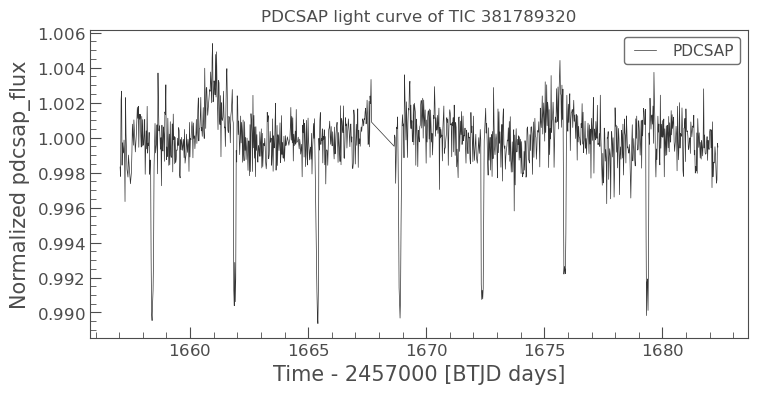

In [8]:
# Plot PDCSAP lightcurve
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP")
ax.set_title("PDCSAP light curve of TIC 381789320")

In [9]:
# Flatten, fold, and bin PDCSAP lightcurve
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=3.495302953029530535)
binned_lc = folded_lc.bin(time_bin_size=0.01)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

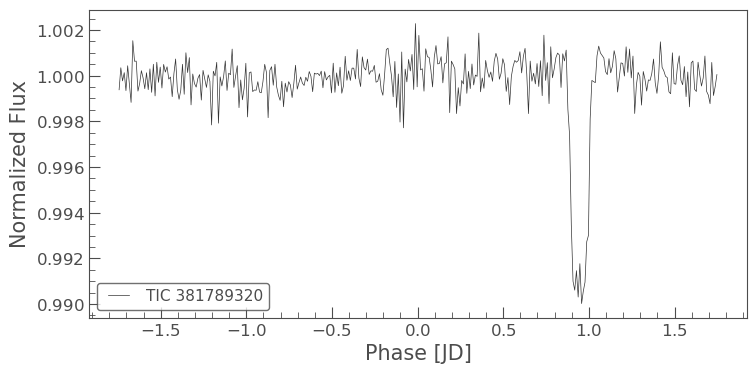

In [10]:
# Plot flattened, folded, and binned PDCSAP lightcurve
lcf[0].flatten(window_length=401).fold(period=3.495302953029530535).bin(time_bin_size=0.01).plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

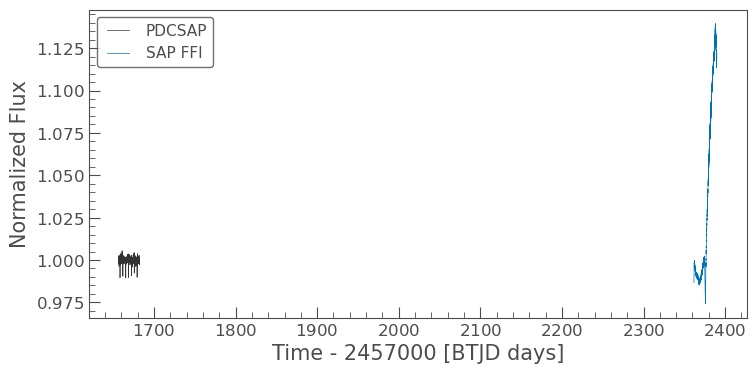

In [11]:
# Plot FFI lightcurve and PDCSAP lightcurve on the same axis
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP")
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [12]:
# Interact with FFI data
ffi_data.interact()
ffi_data.interact_sky()

In [13]:
# Search for all TESS lightcurve data
lcs = lk.search_lightcurve(target_id).download_all()

In [14]:
# Stitch lightcurves and remove outliers
lc = lcs.stitch().remove_outliers()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_bkg', 'sap_bkg_err', 'sap_flux'}
  warnings.warn(


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

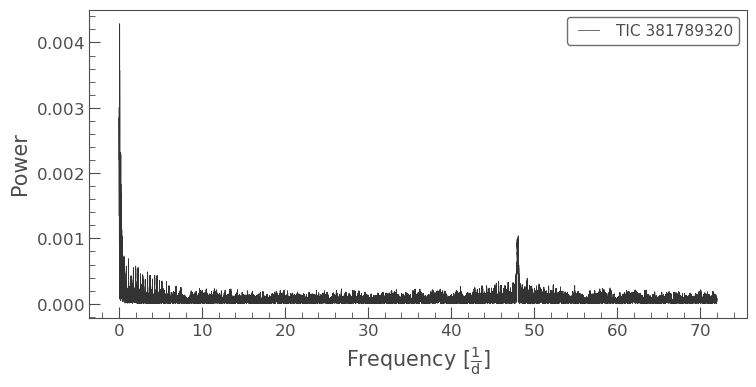

In [15]:
# Plot periodogram of stitched and outlier-removed lightcurve
pg = lc.to_periodogram()
pg.plot()

<AxesSubplot:title={'center':'Target ID: 381789320, Cadence: 20471'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

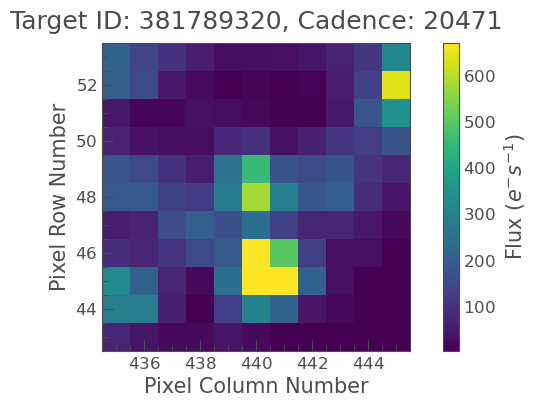

In [16]:
# Plot TESS pixel file
tpf = lk.search_targetpixelfile(target_id).download()
tpf.plot()

<AxesSubplot:title={'center':'Target ID: 381789320, 1653.95 - 1682.35 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

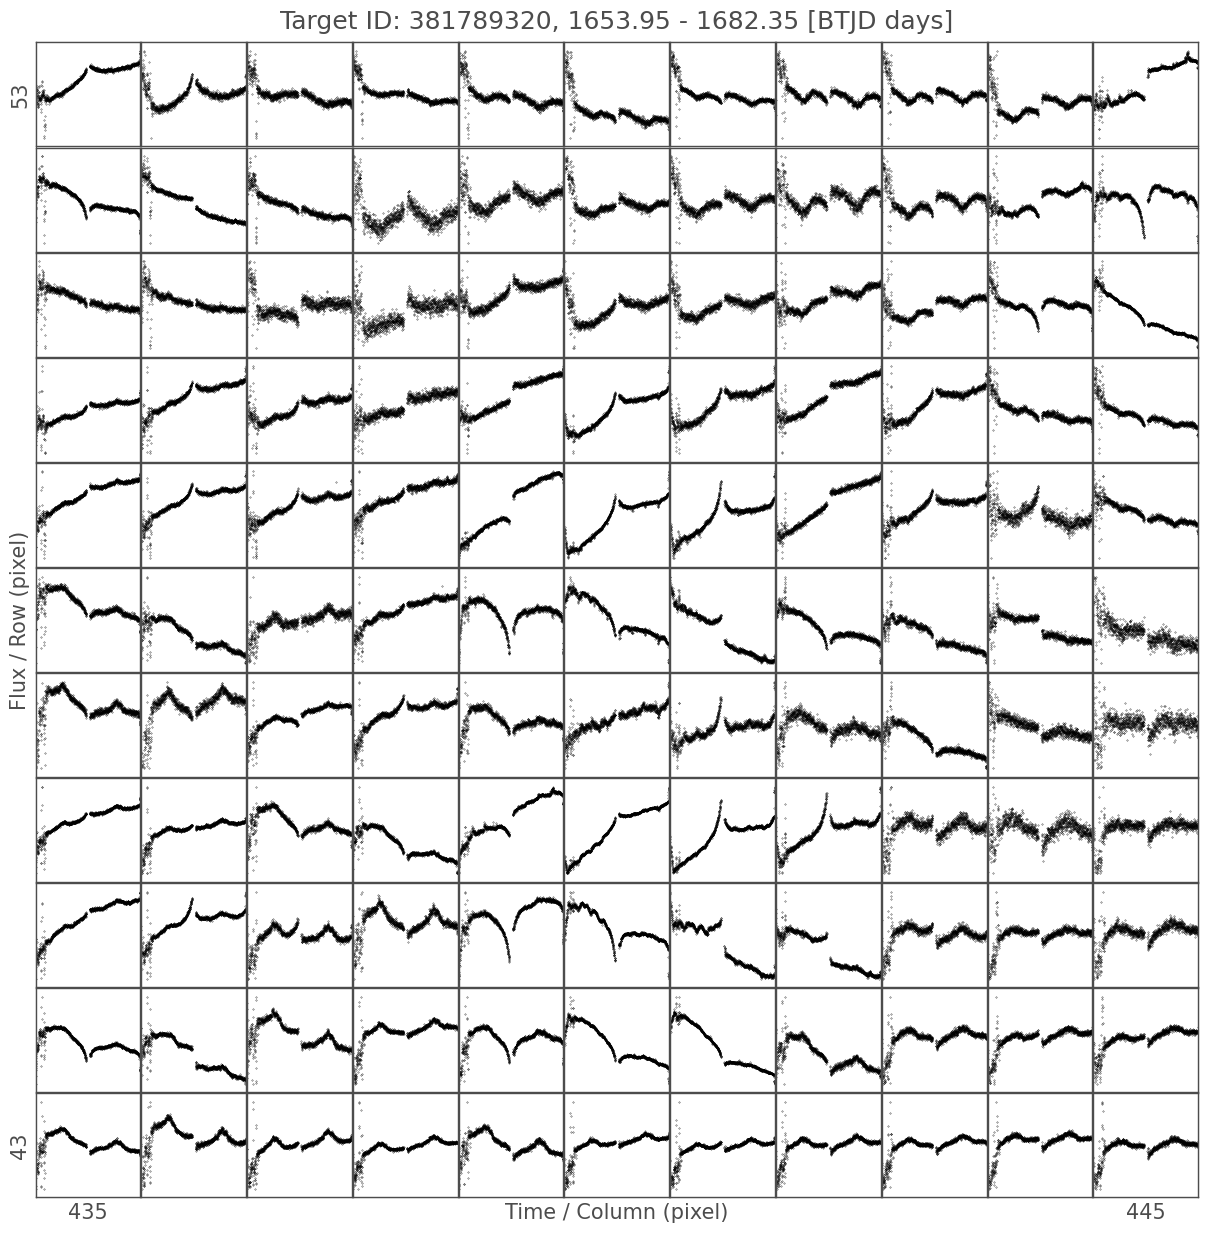

In [17]:
# Plot TESS pixel file pixels
tpf.plot_pixels()

<AxesSubplot:title={'center':'Target ID: 381789320, 1653.95 - 1682.35 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

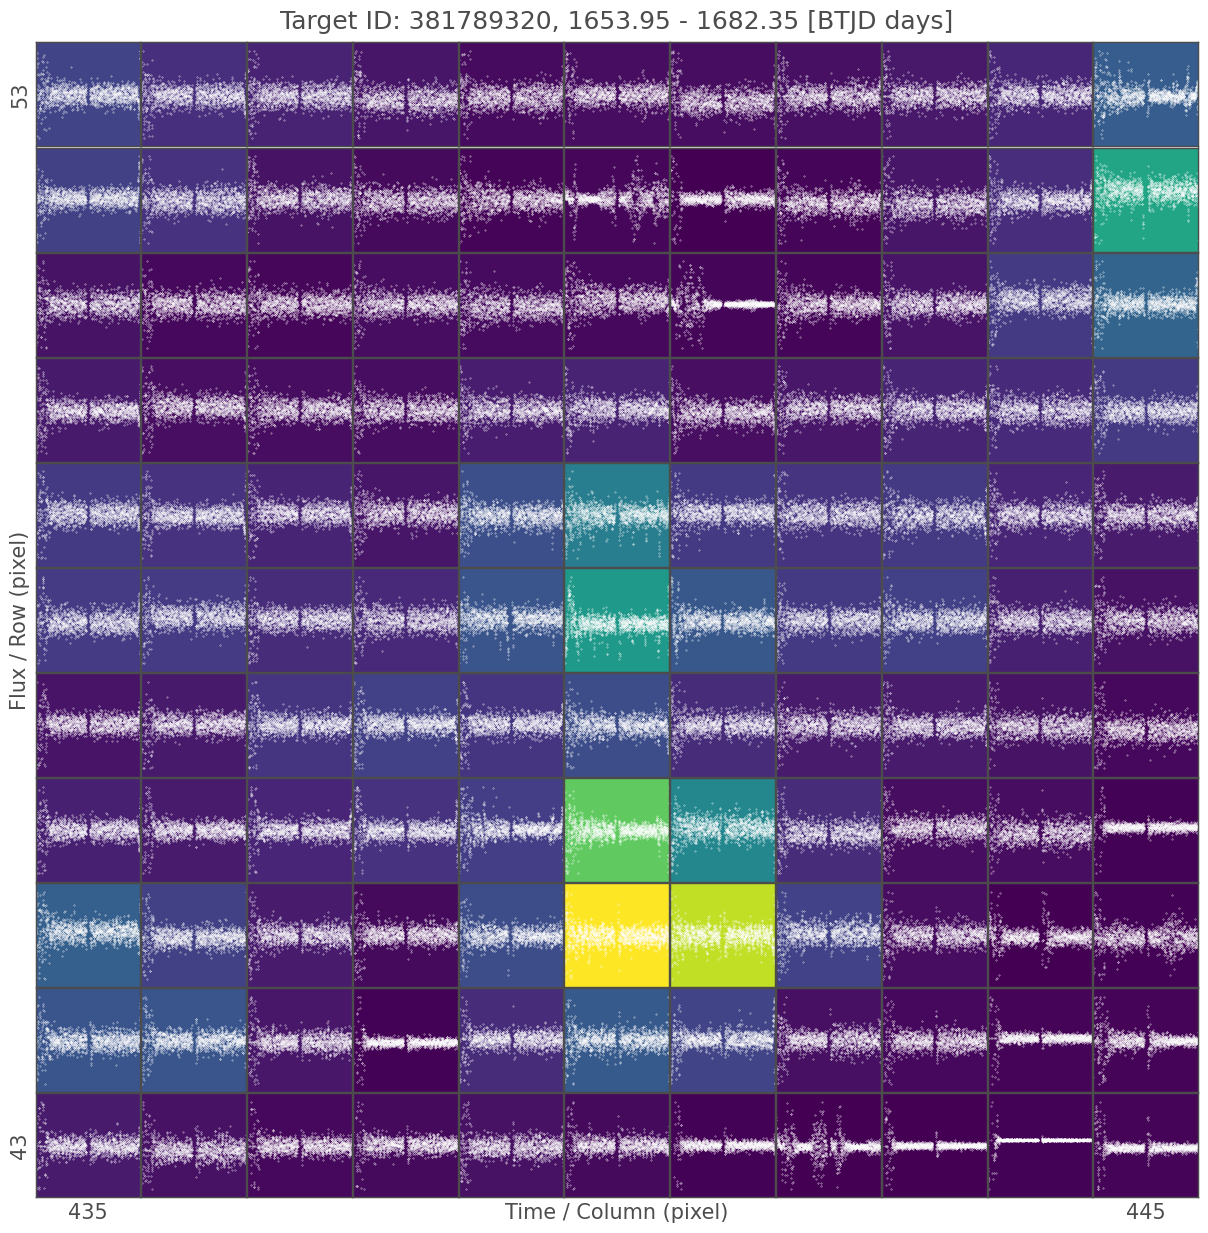

In [18]:
# Plot TESS pixel file pixels with corrected flux and outlier removal
tpf.plot_pixels(corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), show_flux=True)

<AxesSubplot:title={'center':'Target ID: 381789320, 1653.95 - 1682.35 [BTJD days]'}, xlabel='Frequency / Column (pixel)', ylabel='Power / Row (pixel)'>

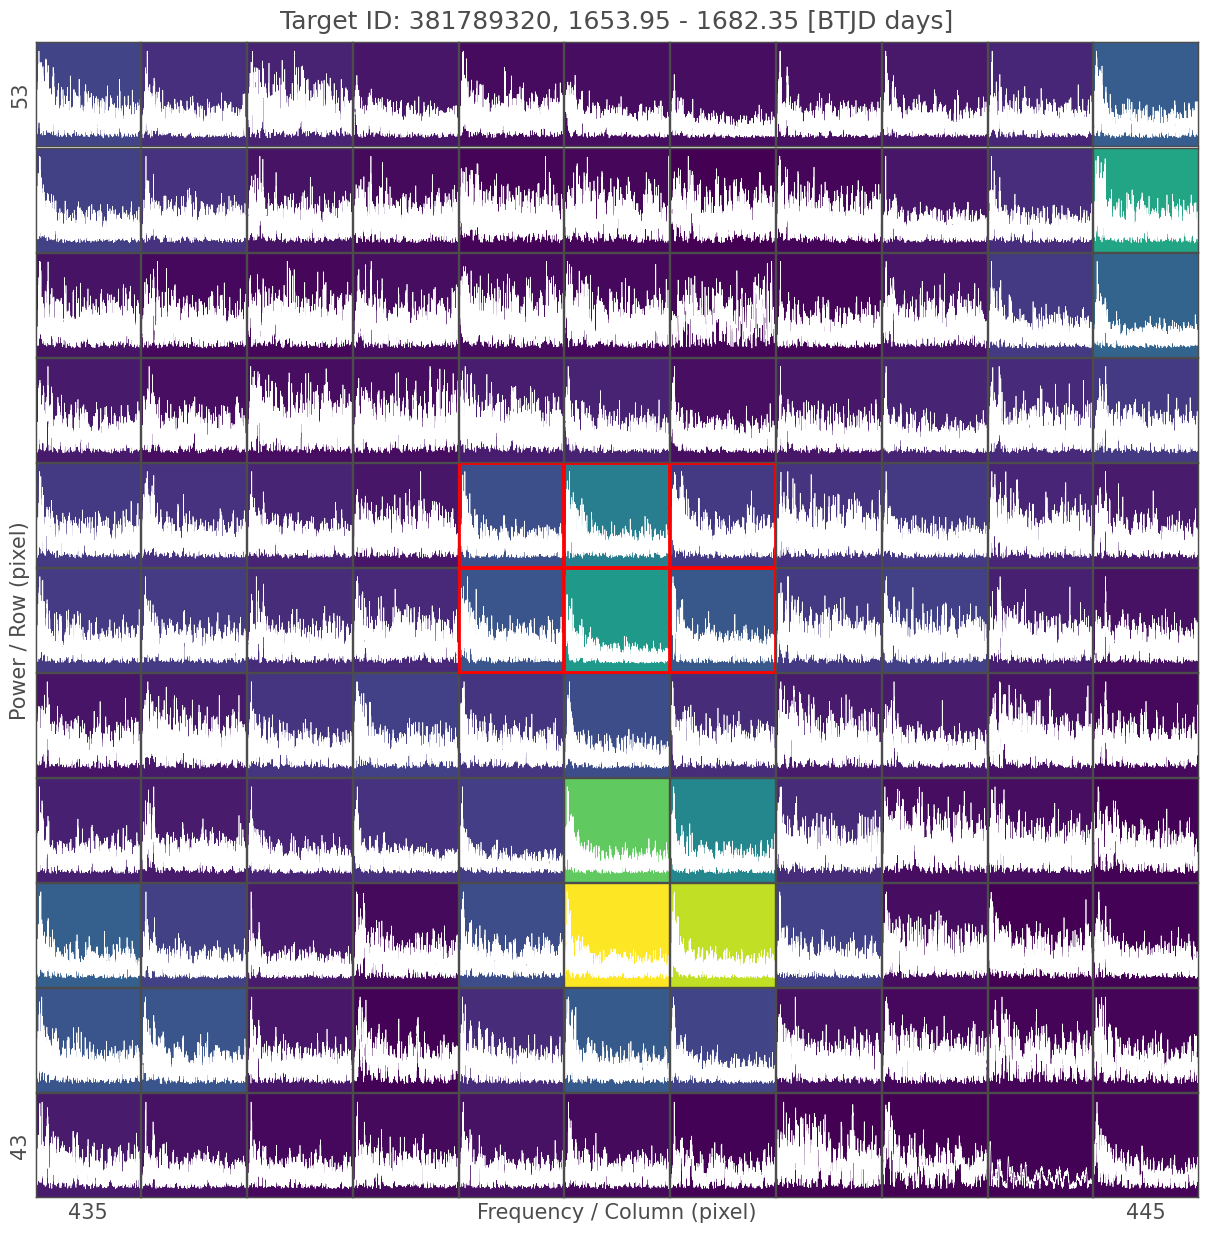

In [19]:
# Plot TESS pixel file pixels with corrected flux, outlier removal, and periodogram
tpf.plot_pixels(corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), periodogram=True, show_flux=True, aperture_mask='pipeline')

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

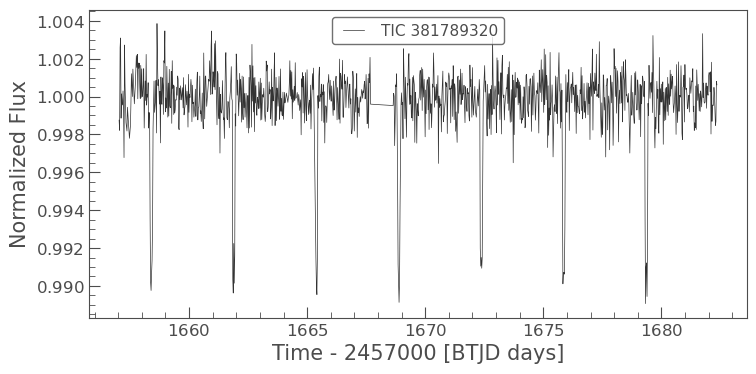

In [20]:
# Search for TESS lightcurve data with hard quality bitmask and flatten it
lc_koi = lk.search_lightcurve(target_id).download(quality_bitmask='hard').flatten()
lc_koi.plot()

<AxesSubplot:title={'center':'Target ID: 381789320, 1653.95 - 1682.35 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

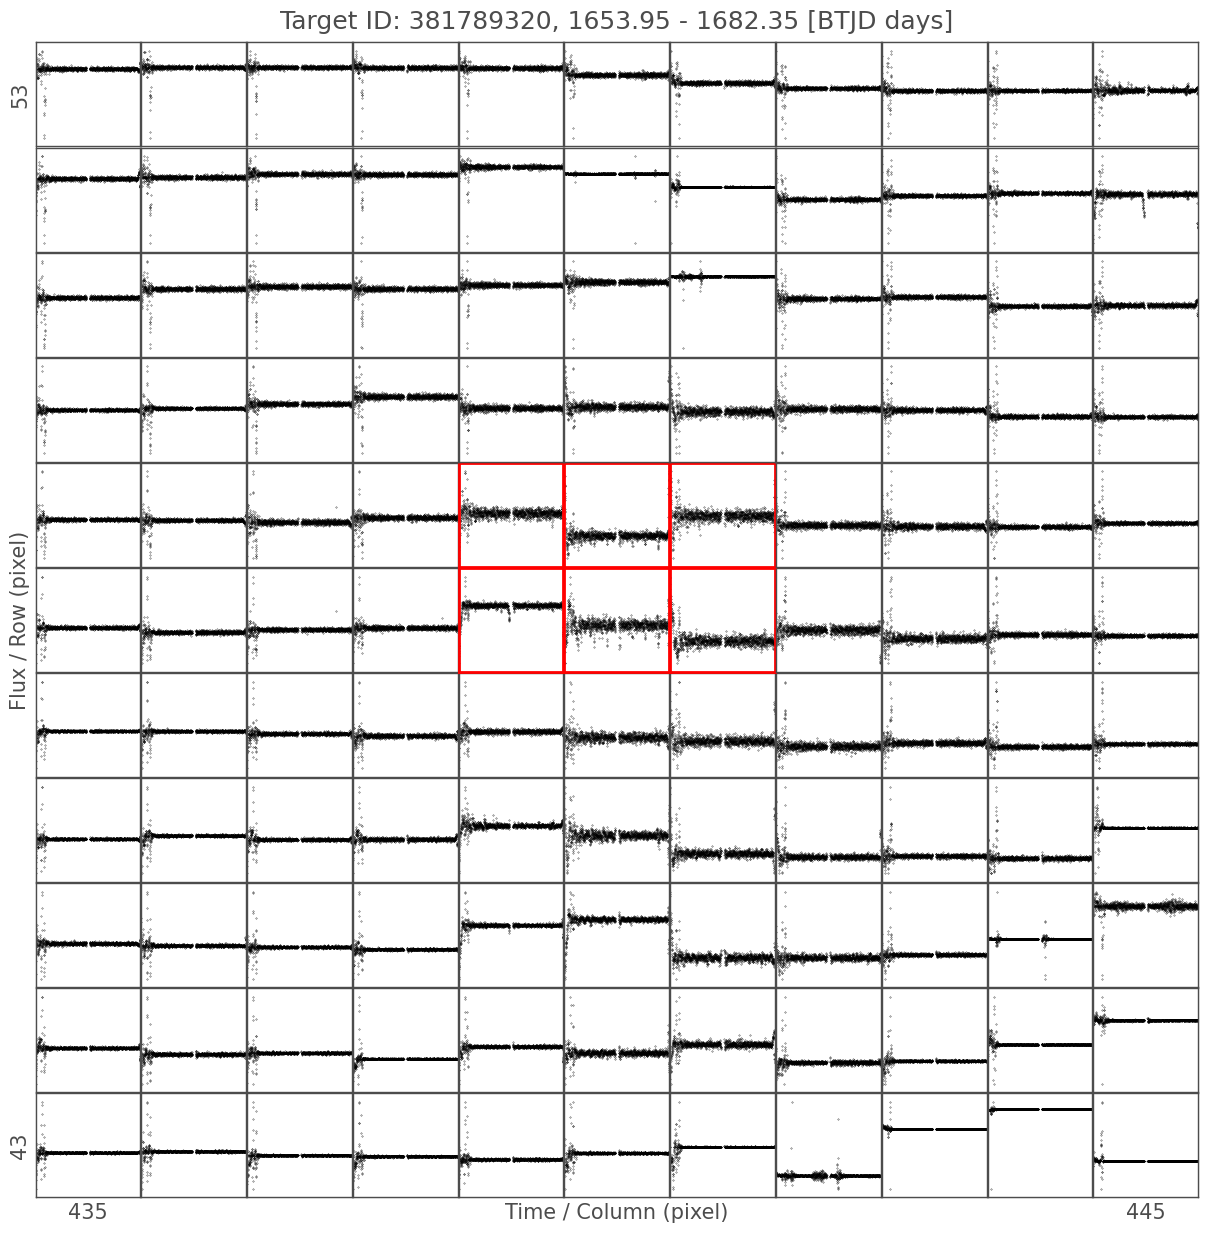

In [21]:
# Plot TESS pixel file pixels with corrected flux and selected aperture mask
tpf_koi = lk.search_targetpixelfile(target_id).download()
tpf_koi.plot_pixels(aperture_mask='pipeline', corrector_func=lambda x: x.remove_nans().flatten())

In [22]:
# Plot contaminated TESS lightcurve data
lc_contam = lk.search_lightcurve(target_id).download()
lc

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


time,flux,flux_err,cadenceno,quality
,,,,
Time,float32,float32,int32,int32
1657.036765108771,9.9831891e-01,1.1908291e-03,20619,0
1657.0575983969013,9.9778265e-01,1.1871600e-03,20620,0
1657.0784316845654,1.0021491e+00,1.1879724e-03,20621,0
1657.0992649722295,1.0026572e+00,1.1887137e-03,20622,0
1657.1200982598941,9.9842387e-01,1.1868355e-03,20623,0
1657.1409315466278,9.9970877e-01,1.1866963e-03,20624,0
1657.161764833361,9.9911427e-01,1.1907985e-03,20625,0
1657.1825981200939,9.9926245e-01,1.1886933e-03,20626,0


C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "


In [ ]:
lk.show_citation_instructions()